In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression, SGDRegressor

In [2]:
Data_train = pd.read_csv(r'C:\Users\ILYA\Downloads\trainhousesproces.csv') 
Data_test = pd.read_csv(r'C:\Users\ILYA\Downloads\testhousesprices.csv') #предсказать цену по этому датасету

In [3]:
Data_train.shape, Data_test.shape

((1460, 81), (1459, 80))

In [4]:
Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X = Data_train.drop('SalePrice', axis=1)
y = Data_train.SalePrice

In [6]:
X.shape[0]

1460

In [7]:
Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
Data_test.shape[0]

1459

<AxesSubplot:>

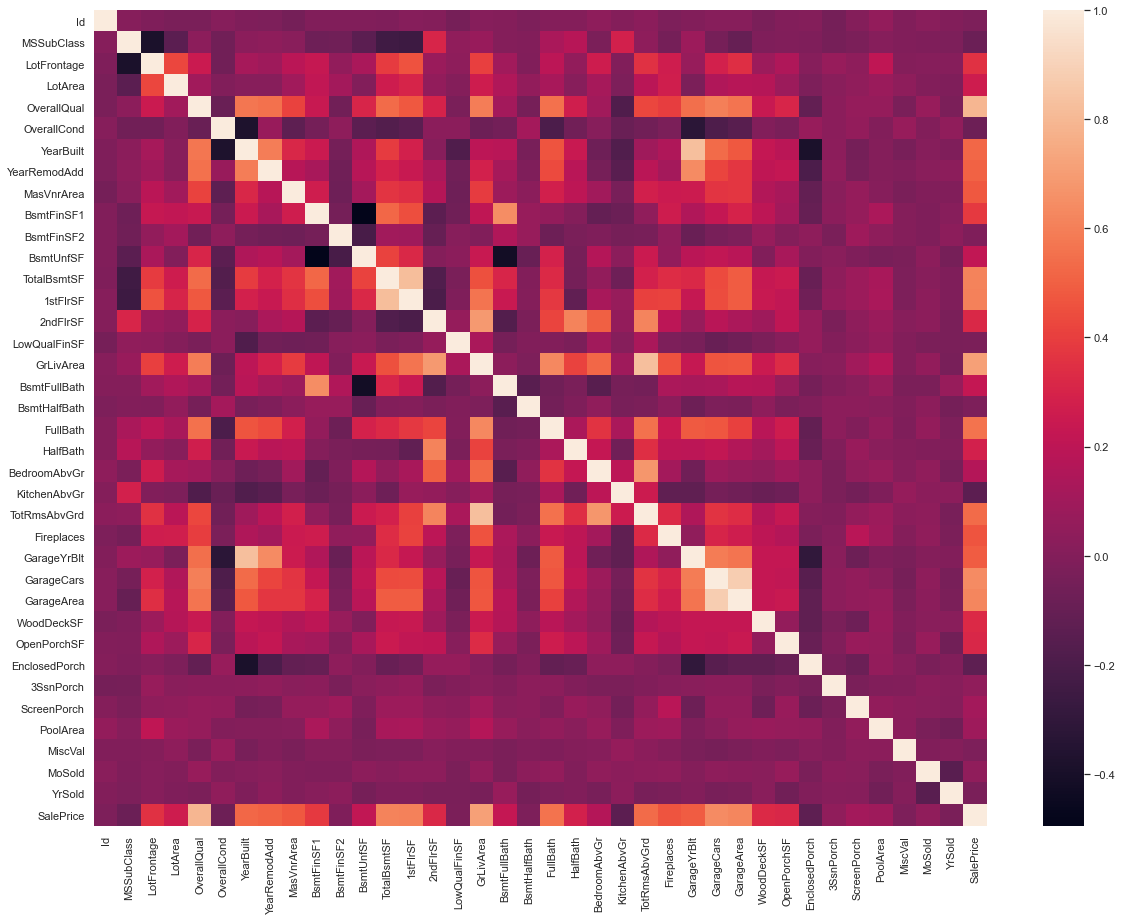

In [9]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.heatmap(Data_train.corr(),annot = False)

<AxesSubplot:>

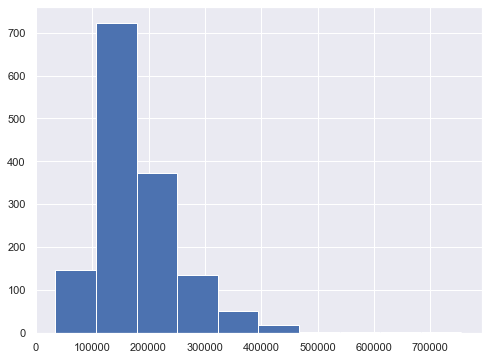

In [10]:
sns.set(rc={'figure.figsize':(8, 6)})
Data_train.SalePrice.hist()

<AxesSubplot:xlabel='SalePrice'>

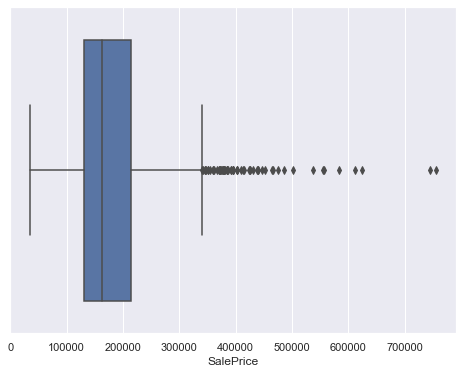

In [11]:
sns.boxplot(x=Data_train.SalePrice)

In [12]:
Data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
Data_train.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [15]:
#Функция которая бы сказала, в каких колонках расширения объекты только два элемента, и делала их бинарными 

In [16]:
X_train_full = pd.concat([X, Data_test])

In [17]:
X_train_full.shape

(2919, 80)

In [18]:
b = []
for i in range (0, 80):
  i = X_train_full.columns[i]
  if X_train_full[i].dtype == 'O':
    a = b.append(X_train_full[i].nunique())
print(b)

c = []
for i2 in range (0, 80):
  i2 = X_train_full.columns[i2]
  if X_train_full[i2].dtype == 'O':
    a = c.append(i2)
print((c))

[5, 2, 2, 4, 4, 2, 5, 3, 25, 9, 8, 5, 8, 6, 8, 15, 16, 4, 4, 5, 6, 4, 4, 4, 6, 6, 6, 5, 2, 5, 4, 7, 5, 6, 3, 5, 5, 3, 3, 4, 4, 9, 6]
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
objective = pd.DataFrame({'objective_feature': c, 'count_of_unique': b})
objective.query('count_of_unique == 2')

,objective_feature,count_of_unique
1,Street,2
2,Alley,2
5,Utilities,2
28,CentralAir,2


In [20]:
objective.head()

,objective_feature,count_of_unique
0,MSZoning,5
1,Street,2
2,Alley,2
3,LotShape,4
4,LandContour,4


In [21]:
X.BsmtFullBath.head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

In [22]:
Data_train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [23]:
# 1 РАБОЧАЯ ВЕРСИЯ
X_full = X_train_full.drop(['Id', 'PoolQC', 'Fence'], axis=1)
# X_full = X_train_full.drop(['Id', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','MoSold','YrSold', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
X_full.Street = X_full.Street.apply(lambda x: 1 if x == 'Pave' else 0)
X_full.Utilities = X_full.Utilities.apply(lambda x: 1 if x == 'AllPub' else 0)
X_full.CentralAir = X_full.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)
X_full = X_full.fillna({'LotFrontage' : X.LotFrontage.median()})
X_full = X_full.fillna({'MasVnrArea' : X.MasVnrArea.median()})
X_full = X_full.fillna({'BsmtFinSF1' : X.BsmtFinSF1.median()})


X_full['Total_sqr_footage'] = (X_full['BsmtFinSF1'] + X_full['BsmtFinSF2'] +
                                 X_full['1stFlrSF'] + X_full['2ndFlrSF'])

X_full['Total_Bathrooms'] = (X_full['FullBath'] + (0.5 * X_full['HalfBath']) +
                               X_full['BsmtFullBath'] + (0.5 * X_full['BsmtHalfBath']))

X_full['Total_porch_sf'] = (X_full['OpenPorchSF'] + X_full['3SsnPorch'] +
                              X_full['EnclosedPorch'] + X_full['ScreenPorch'] +
                              X_full['WoodDeckSF'])

#Посмотреть на эти фичи

from sklearn.metrics import roc_auc_score
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
X_full['haspool'] = X_full['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X_full['has2ndfloor'] = X_full['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
X_full['hasgarage'] = X_full['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X_full['hasbsmt'] = X_full['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X_full['hasfireplace'] = X_full['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

X_full= X_full.fillna(0)
X_full = pd.get_dummies(X_full)

In [24]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 306 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(13), int64(34), uint8(259)
memory usage: 1.8 MB


In [25]:
X_full.shape

(2919, 306)

In [26]:
Xfortrain = X_full[:X.shape[0]]
Xfortrain.shape

(1460, 306)

In [27]:
Xfortest = X_full[X.shape[0]:]
Xfortest.shape

(1459, 306)

In [28]:
scaler = StandardScaler()
Xfortrain_scaled = scaler.fit_transform(Xfortrain)
Xfortest_scaled = scaler.fit_transform(Xfortest)

In [29]:
len(Xfortrain_scaled)

1460

In [30]:
len(Xfortest_scaled)

1459

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xfortrain, y, train_size=0.8, random_state=17)

In [32]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(Xfortrain_scaled, y, train_size=0.8, random_state=17)

In [33]:
X_train_sc

array([[ 0.07337496, -0.26628808, -0.18880108, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496, -0.03922314,  0.03158717, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.00618985,  0.07027287, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.87256276,  0.36949376, -0.01822318, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 2.43821926, -1.58326474, -0.67968858, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 2.43821926, -0.03922314, -0.84184783, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [53]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=17)

# models:
# RandomForest
Forest1 = RandomForestRegressor(random_state=17, n_jobs=-1)
forest_params = {'n_estimators': range(110, 120, 5),
                 'max_depth': range(10, 60, 5), 
                 'min_samples_leaf': range(1, 8)}
RFgridsearch1 = GridSearchCV(Forest1, forest_params, cv=kfolds, n_jobs=-1)

#LassoCV
lasso_cv1 = LassoCV(alphas = np.logspace(-6, 2, 200), cv=kfolds, random_state=17, n_jobs=-1)

#Ridge
ridge_cv1 = RidgeCV(alphas = np.logspace(-6, 2, 250), cv=kfolds)

#SGD
sgd1 = SGDRegressor?

#Linregression КАЛ
linreg1 = BaggingRegressor(LinearRegression(normalize =True, n_jobs=-1), n_estimators=5, n_jobs=-1, random_state=17)

#LogistRegression  КАЛ
logistreg1 = LogisticRegression(random_state=17, class_weight= 'balanced')
parameters_for_LOGISTIC = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
gridsearchLOGISTIC = GridSearchCV(logistreg1, parameters_for_LOGISTIC, cv=KFold(n_splits=10, shuffle=True, random_state=17)
)

#SVM regressor КАЛ
svr1 = SVR(C= 20, epsilon= 0.008, gamma=0.0003) #SVR(C= 20, epsilon= 0.008, gamma=0.0003)
# gridsearchSVM = GridSearchCV(svr1, parameters_for_LOGISTIC, cv=3, n_jobs=-1)
# (C= 20, epsilon= 0.008, gamma=0.0003,)

bagging1 = BaggingRegressor(LogisticRegression(class_weight='balanced'), n_estimators=5, n_jobs=-1, random_state=17)

Init signature:
SGDRegressor(
    loss='squared_loss',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of t

In [35]:
a= np.logspace(-6, 2, 200)

In [49]:
#Для расчета одной модели, сразу считает Bagging для модели 
def reports_of_func (model, X_train, y_train, X_test, y_test):
    a = BaggingRegressor(model, n_estimators=5, n_jobs=-1, random_state=17)
    a.fit(X_train, y_train)
    
    print('Model:', a)  #['model'].split('(')[:1]
    print('Score:', a.score(X_test, y_test))
    print('RMSE:', mean_squared_error(y_test, a.predict(X_test), squared=False))

In [50]:
%%time
reports_of_func(lasso_cv1, X_train1,  y_train1, X_test1, y_test1)

Model: BaggingRegressor(base_estimator=LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e...
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
                                        cv=KFold(n_splits=10, random_state=17, shuffle=True),
                                        n_jobs=-1, random_state=17),
                 n_estimators=5, n_jobs=-1, random_state=17)
Score: 0.9057452422980233
RMSE: 24093.29576721992
Wall time: 14min 18s


In [35]:
#Для расчёта всех моделей сразу, которые не признаны калом
def reports_of_func_in_one (model1, model2, model3, X_train, y_train, X_test, y_test):
    model_list = [model1 , model2 , model3]
    for model in model_list:
        model.fit(X_train, y_train)
        print('Model:', model)  #['model'].split('(')[:1]
        print('Score:', model.score(X_test, y_test))
        print('RMSE:', mean_squared_error(y_test, model.predict(X_test), squared=False))
        print('________________________________________________________________________')
        print('________________________________________________________________________')
    #a = pd.DataFrame({})

In [413]:
%%time
reports_of_func_in_one(gridsearch1, lasso_cv1, ridge_cv1, X_train_sc, y_train_sc, X_test_sc,  y_test_sc)

Model: GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 5),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': range(110, 120, 5)})
Score: 0.8808583167662065
RMSE: 27087.96858600937
________________________________________________________________________
________________________________________________________________________
Model: LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.8896

In [36]:
#Создания одной таблицы из предсказаний от каждой хорошей модели, взять от каждой строки среднее --Вуаля
def tablet_1 (model1, model2, model3, X_train, y_train, X_test, y_test):
    a = pd.DataFrame({'Id': range(1, X_test.shape[0]+1), 'Price_from_Lasso': model1.fit(X_train, y_train).predict(X_test)}).set_index('Id')
    
    a['Price_from_Ridge'] = model2.fit(X_train, y_train).predict(X_test)
    a['Price_from_GridSRandomFor'] = model3.fit(X_train, y_train).predict(X_test)
    
    a['SalePrice'] = (a.Price_from_Lasso + a.Price_from_Ridge + a.Price_from_GridSRandomFor)/3
    print(a)
    y_predicted = np.array(a['SalePrice']) 
    

In [39]:
%%time
tablet_1(lasso_cv1, ridge_cv1, gridsearch1, X_train1, y_train1, X_test1,  y_test1)

     Price_from_Lasso  Price_from_Ridge  Price_from_GridSRandomFor  \
Id                                                                   
1       123220.499273     118547.734375              152523.534586   
2       274716.047965     266356.302620              243444.435673   
3       236327.067379     233764.817941              235641.793727   
4       239256.773622     245088.145572              248718.054237   
5       231162.285107     230992.207488              219180.131325   
..                ...               ...                        ...   
288     229958.721647     236020.230514              227933.200083   
289     176688.144140     182649.348851              172455.945556   
290     177840.439486     174884.164417              176419.807118   
291     187453.480184     199590.369976              192290.521946   
292     164749.244754     180308.095357              160902.202484   

         SalePrice  
Id                  
1    131430.589412  
2    261505.595419  
3    

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [326]:
#Для тестовой выборки 
y_MAINtest_predictions = ridge_cv1.predict(Xfortest_scaled)

In [328]:
#Создание таблицы для соревнования

pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': y_MAINtest_predictions}).set_index('Id').to_csv('Try6_HousesPrices.csv')

In [207]:
model = 'GridSearchCV(cv=3, estimator=RandomForestR'
model.split('(')[:1]

['GridSearchCV']

In [ ]:
s = "text text : one two three"
print(s.split(':')[1])

In [136]:
def tablet_2 (model1, model2, model3, X_train, y_train, X_test):
    a = pd.DataFrame({'Id':  range(1461, 2920), 'Price_from_Lasso': model1.fit(X_train, y_train).predict(X_test)}).set_index('Id')
    
    a['Price_from_Ridge'] = model2.fit(X_train, y_train).predict(X_test)
    a['Price_from_GridSRandomFor'] = model3.fit(X_train, y_train).predict(X_test)
    
    a['SalePrice'] = (a.Price_from_Lasso + a.Price_from_Ridge + a.Price_from_GridSRandomFor)/3
    print(a)
    print('_________________________________________________________________________________________')
    b = a.drop(['Price_from_Lasso', 'Price_from_Ridge', 'Price_from_GridSRandomFor'], axis=1)
    print(b)
    #y_predicted = np.array(a['SalePrice']) 
    b.to_csv('Try12_HousesPrices.csv')

In [137]:
%%time
tablet_2(lasso_cv1, ridge_cv1, RFgridsearch1, Xfortrain, y, Xfortest)

      Price_from_Lasso  Price_from_Ridge  Price_from_GridSRandomFor  \
Id                                                                    
1461     115731.873716     102153.917779              132143.801372   
1462     147393.838316     145685.341667              167694.897923   
1463     180084.412633     172747.230542              176182.958174   
1464     193344.094593     187303.401209              189638.269902   
1465     207722.703679     202125.473348              196999.991940   
...                ...               ...                        ...   
2915      81858.024704      77434.984972               83951.756760   
2916      69822.357171      70535.549128               91195.971120   
2917     164960.509037     157897.660360              167944.659197   
2918     114699.682310     107065.397510              110417.440366   
2919     223252.510297     229254.892309              227666.086957   

          SalePrice  
Id                   
1461  116676.530955  
1462  1535

In [59]:
#Вывод: работает хуже чем Tablet_2 c неотшклаированными данными
#tablet_2(lasso_cv1, ridge_cv1, gridsearch1, Xfortrain_scaled, y, Xfortest_scaled)

In [43]:
Xfortrain.shape, y.shape, Xfortest.shape #fes

((1460, 290), (1460,), (1459, 290))

In [57]:
#Вывод: работает хуже чем Tablet_2 c неотшклаированными данными
def tablet_3 (model1, model2, model3, X_trainNoSC, X_trainSC, X_testNoSC, X_testSC, y_train):
    a = pd.DataFrame({'Id':  range(1461, 2920), 'Price_from_Lasso_NoScaled': model1.fit(X_trainNoSC, y_train).predict(X_testNoSC)}).set_index('Id')
    a['Price_from_Lasso_Scaled'] = model1.fit(X_trainSC, y_train).predict(X_testSC)


    a['Price_from_Ridge_NOscaled'] = model2.fit(X_trainNoSC, y_train).predict(X_testNoSC)
    a['Price_from_Ridge_Scaled'] = model2.fit(X_trainSC, y_train).predict(X_testSC)

    a['Price_from_GridSRandomFor_NOscaled'] = model3.fit(X_trainNoSC, y_train).predict(X_testNoSC)
    a['Price_from_GridSRandomFor_Scaled'] = model3.fit(X_trainSC, y_train).predict(X_testSC)

    a['SalePrice'] = (a.Price_from_Lasso_NoScaled + a.Price_from_Lasso_Scaled + a.Price_from_Ridge_NOscaled + a.Price_from_Ridge_Scaled + a.Price_from_GridSRandomFor_NOscaled + a.Price_from_GridSRandomFor_Scaled)/6

    print(a)
    print('_________________________________________________________________________________________')
    b = a.drop(['Price_from_Lasso_NoScaled', 'Price_from_Lasso_Scaled', 'Price_from_Ridge_NOscaled', 'Price_from_Ridge_Scaled', 'Price_from_GridSRandomFor_NOscaled', 'Price_from_GridSRandomFor_Scaled'], axis=1)
    print(b)
    #y_predicted = np.array(a['SalePrice']) 
    b.to_csv('Try9_HousesPrices.csv')

In [58]:
%%time
tablet_3(lasso_cv1, ridge_cv1, gridsearch1, Xfortrain, Xfortrain_scaled, Xfortest, Xfortest_scaled, y)

      Price_from_Lasso_NoScaled  Price_from_Lasso_Scaled  \
Id                                                         
1461              116361.039101            115354.135634   
1462              146951.801646            164693.073423   
1463              181360.780327            194351.258178   
1464              194775.104862            199050.255250   
1465              207568.941051            201156.817887   
...                         ...                      ...   
2915               83544.069164             79280.919184   
2916               70991.951659             71569.020135   
2917              164965.036837            185968.100174   
2918              112531.900358            113233.181996   
2919              223682.821214            226661.497559   

      Price_from_Ridge_NOscaled  Price_from_Ridge_Scaled  \
Id                                                         
1461              102197.733611            113812.926081   
1462              144155.692212        